<a href="https://colab.research.google.com/github/maldinf/PortofolioProject/blob/main/AirBnB%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIRBNB PROJECT**

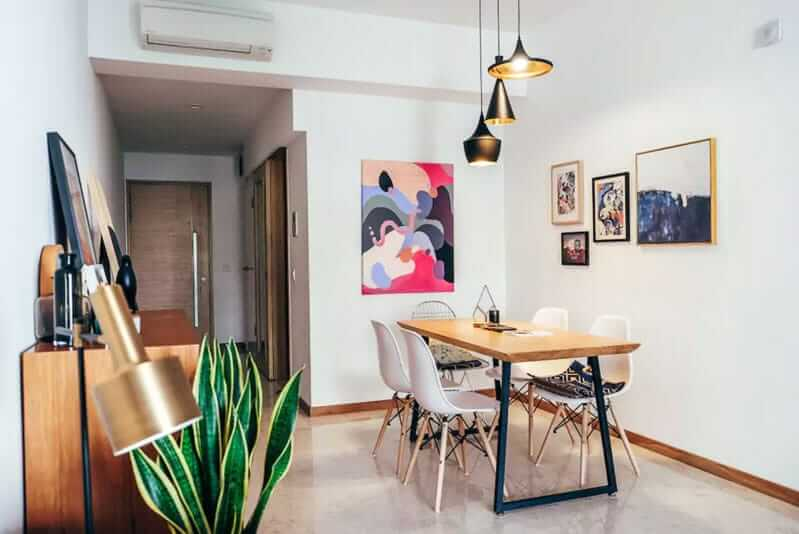





# IMPORT DATA

In [1]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
listing = pd.read_excel('/content/drive/MyDrive/Bootcamp Data Analyst/projekdq/DQLab_listings(22Sep2022).xlsx')
nbhood = pd.read_excel ('/content/drive/MyDrive/Bootcamp Data Analyst/projekdq/DQLab_nieghbourhood(22Sep2022).xlsx')
rvws = pd.read_excel ('/content/drive/MyDrive/Bootcamp Data Analyst/projekdq/DQLab_reviews(22Sep2022).xlsx')

# DATA OVERVIEW

In [7]:
# LISTING DATA INFO
listing.info()
print('\n missing value =', listing.isna().sum().sum())
print('\n duplicate value =', listing.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   columns           4161 non-null   int64  
 1   id                4160 non-null   float64
 2   name              4160 non-null   object 
 3   host_id           4160 non-null   float64
 4   host_name         4160 non-null   object 
 5   neighbourhood     4160 non-null   object 
 6   latitude          4160 non-null   float64
 7   longitude         4160 non-null   float64
 8   room_type         4160 non-null   object 
 9   price             4160 non-null   float64
 10  minimum_nights    4160 non-null   float64
 11  availability_365  4160 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 390.2+ KB

 missing value = 11

 duplicate value = 0


In [8]:
# BERIKUT MERUPAKAN SAMPLE DARI DATASET LISTING
listing.head()

,columns,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,2802,4.779004e+07,lyf Funan Singapore by Ascott | co-living space,385189116.0,Jay Vincent,Museum,1.292607,103.848885,Hotel room,0.0,1.0,0.0
1,1028,2.484978e+07,TS,187844948.0,Ben,Ang Mo Kio,1.370030,103.842410,Private room,13.0,180.0,0.0
2,3446,6.077839e+17,"Single room in R&F, JB, 650m to CIQ/SG 单人房",31557595.0,Jay,Woodlands,1.461630,103.769150,Private room,14.0,90.0,358.0
3,3809,6.699492e+17,Rental room near NTU - Jurong west st 81 SG 64...,129064266.0,Aravin,Jurong West,1.348130,103.695976,Private room,14.0,92.0,365.0
4,3117,5.319061e+07,Yaya's Staycation,266051529.0,Shareff,Woodlands,1.475250,103.781190,Private room,15.0,1.0,342.0


In [9]:
listing.describe()

,columns,id,host_id,latitude,longitude,price,minimum_nights,availability_365
count,4161.000000,4.160000e+03,4.160000e+03,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000
mean,2080.000000,1.355110e+17,1.559972e+08,1.344537,103.815145,214.545433,57.558654,247.762019
std,1201.321564,2.653485e+17,1.356392e+08,0.066970,0.065457,454.968693,65.752258,132.527399
min,0.000000,5.064600e+04,2.366600e+04,1.248260,103.635300,0.000000,1.000000,0.000000
25%,1040.000000,2.506036e+07,4.187059e+07,1.296077,103.769548,60.000000,1.000000,126.750000
50%,2080.000000,3.989291e+07,1.367001e+08,1.313935,103.840411,120.000000,92.000000,322.000000
75%,3120.000000,5.319617e+07,2.388916e+08,1.414627,103.855035,235.250000,92.000000,361.000000
max,4160.000000,7.208120e+17,4.804050e+08,1.488000,103.977662,12494.000000,1000.000000,365.000000


DISTRIBUSI DATA PADA DATASET LISTING

In [10]:
fig_dist1 = px.box(data_frame=listing, x = 'availability_365', width = 500, height=200)
display(fig_dist1)
fig_dist2 = px.box(data_frame=listing, x = 'minimum_nights', width = 500, height=200)
display(fig_dist2)
fig_dist3 = px.box(data_frame=listing, x = 'price', width = 500, height=200)
display(fig_dist3)

In [11]:
listing = listing[listing['minimum_nights']<=365].reset_index()
fig_dist2 = px.box(data_frame=listing, x = 'minimum_nights', width = 500, height=200)
display(fig_dist2)

DISTRIBUSI PERSEBARAN KAMAR AIRBNB DI SINGAPURA

In [12]:
fig_map = px.scatter_mapbox(listing, lat="latitude", lon="longitude", hover_name='id',zoom=9, height=300, width=400)
fig_map.update_layout(mapbox_style="open-street-map")
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()

Berdasarkan hasil dari data distribusi kamar tersebut. diketahui beberapa data kamar yang letaknya diluar dari Singapura, karnanya perlu dilakukan data cleansing untuk menghilangkannya

In [13]:
#cleansing data yang berada di sebelah utara Singapura
listing = listing[listing['latitude']<1.45328] 

#cleansing data yang berada lebih dari barat laut Singapura
outer_place_index = listing[ (listing['latitude'] > 1.405) & (listing['longitude'] < 103.664) ].index 
listing.drop(outer_place_index , inplace=True)

#cleansing data  yang masih berada di luar Singapura
outer_id_index = listing[listing['id'].isin([708999801528964619,39732595,39757287,28268681,29171020,27248990,27532454,540170321699689740])].index
listing.drop(outer_id_index , inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
fig_map2 = px.scatter_mapbox(listing, lat="latitude", lon="longitude", hover_name='name',zoom=9, height=300, width=500)
fig_map2.update_layout(mapbox_style="open-street-map")
fig_map2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map2.show()

# REVIEWS DATASET

In [15]:
rvws.info()
print('\n missing value =', listing.isna().sum().sum())
print('\n duplicate value =', listing.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  49695 non-null  int64 
 1   date        49695 non-null  object
dtypes: int64(1), object(1)
memory usage: 776.6+ KB

 missing value = 0

 duplicate value = 0


## Beberapa data listing (kamar) yang dihapus karna data diluar Singapura, maka dataset reviews juga perlu dilakukan cleaning data untuk adjusment data

In [16]:
reviews = rvws[rvws['listing_id'].isin(listing['id']) == True]
print('kini dataset telah di adjustemnt, sehingga memiliki', reviews.shape[1], 'kolom, dan', reviews.shape[0], 'baris data')

kini dataset telah di adjustemnt, sehingga memiliki 2 kolom, dan 22478 baris data


In [17]:
display(reviews.head())

display(reviews.tail())

,listing_id,date
0,71609,2018-07-14
1,71609,2019-01-06
2,71609,2019-07-27
3,71609,2019-08-11
4,71609,2019-09-07


,listing_id,date
49688,712014563808839936,2022-09-18
49689,712121357550091520,2022-09-13
49690,712907319520281088,2022-09-14
49691,712907319520281088,2022-09-15
49692,712907319520281088,2022-09-16


# NBHOOD DATASET

In [18]:
rvws.info()
print('\n missing value =', listing.isna().sum().sum())
print('\n duplicate value =', listing.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  49695 non-null  int64 
 1   date        49695 non-null  object
dtypes: int64(1), object(1)
memory usage: 776.6+ KB

 missing value = 0

 duplicate value = 0


In [19]:
nbhood.head()

,neighbourhood_group,neighbourhood
0,Central Region,Bishan
1,Central Region,Bukit Merah
2,Central Region,Bukit Timah
3,Central Region,Downtown Core
4,Central Region,Geylang


# MERGE DATA

In [20]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=2dd5ad949bc83f326a72da5a2a80648d965b1a9d53dbfedfb7d3616f48930b04
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [21]:
import pandasql as ps
listing_nbgroup = ps.sqldf("""
                   select 
                      b.id, 
                      b.name, 
                      a.neighbourhood_group,
                      b.room_type, 
                      b.neighbourhood,
                      b.longitude, 
                      b.latitude, 
                      b.minimum_nights, 
                      b.price, 
                      (365-b.availability_365) rented_365
                   from nbhood a 
                   join listing b 
                   on a.neighbourhood=b.neighbourhood 
                """)
display(listing_nbgroup.head())

,id,name,neighbourhood_group,room_type,neighbourhood,longitude,latitude,minimum_nights,price,rented_365
0,4926170.0,Room 4B in Terrace House @ Thomson Village,Central Region,Private room,Bishan,103.83274,1.35349,92.0,47.0,9.0
1,11128602.0,Luxury 3 bedroom condo. 1389sqf,Central Region,Entire home/apt,Bishan,103.83075,1.36628,180.0,200.0,0.0
2,13243736.0,Charming 2Bed-2Bath- Parking Full Apartment,Central Region,Entire home/apt,Bishan,103.82800,1.35725,92.0,209.0,35.0
3,19438458.0,Modern zen bungalow in upper thomson,Central Region,Private room,Bishan,103.82808,1.35732,92.0,330.0,365.0
4,20865016.0,Lush Green Neighborhood Private Room,Central Region,Private room,Bishan,103.83001,1.35751,92.0,50.0,2.0


***`Lalu, dilakukan pembuatan dataset baru untuk memenuhi dan mempermudah kebutuhan analisa `***

In [22]:
listing_reviews = ps.sqldf("""
                   select 
                      b.id,
                      a.date,
                      strftime('%Y-%m', a.date) month, 
                      strftime('%Y', a.date) year, 
                      b.name, 
                      b.room_type, 
                      b.neighbourhood, 
                      c.neighbourhood_group, 
                      b.price, 
                      b.minimum_nights, 
                      (365-b.availability_365) rented_365
                   from reviews a 
                   left join listing b 
                   on a.listing_id=b.id 
                   join nbhood c 
                   on b.neighbourhood = c.neighbourhood
                """)
listing_reviews.head()

,id,date,month,year,name,room_type,neighbourhood,neighbourhood_group,price,minimum_nights,rented_365
0,71609.0,2018-07-14,2018-07,2018,Ensuite Room (Room 1 & 2) near EXPO,Private room,Tampines,East Region,145.0,92.0,25.0
1,71609.0,2019-01-06,2019-01,2019,Ensuite Room (Room 1 & 2) near EXPO,Private room,Tampines,East Region,145.0,92.0,25.0
2,71609.0,2019-07-27,2019-07,2019,Ensuite Room (Room 1 & 2) near EXPO,Private room,Tampines,East Region,145.0,92.0,25.0
3,71609.0,2019-08-11,2019-08,2019,Ensuite Room (Room 1 & 2) near EXPO,Private room,Tampines,East Region,145.0,92.0,25.0
4,71609.0,2019-09-07,2019-09,2019,Ensuite Room (Room 1 & 2) near EXPO,Private room,Tampines,East Region,145.0,92.0,25.0


# ANALISIS DATA

***`Bagaimana persebaran kamar pada setiap Neighbourhood?`***

In [23]:
nbg_pie = px.pie(listing_nbgroup, values=listing_nbgroup['neighbourhood_group'].value_counts().values, color=listing_nbgroup['neighbourhood_group'].value_counts().index, names=listing_nbgroup['neighbourhood_group'].value_counts().index, color_discrete_sequence=["#FF597B","#7F167F","#97DECE","#C58940","#ADE792"], hole=0.5, width = 750)
nbg_pie.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -200)
nbg_pie.update_layout(title="<b>Listing distribution by Neighbourhood Group</b>", title_font=dict(size=16))
nbg_pie.show()

***`Bagaimana distribusi harga pada setiap Neighbourhood?`***

In [24]:
listing_nbgroup.groupby('neighbourhood_group').agg(price_mean=('price','mean')).sort_values(by=['price_mean'],ascending=False).reset_index()

,neighbourhood_group,price_mean
0,Central Region,253.177717
1,North Region,241.963415
2,West Region,233.147321
3,East Region,216.888889
4,North-East Region,193.386139


Berdasarkan data diatas, diketahui bahwa Centra Region memiliki harga rata rata tertinggi dari setiap region. Selanjutkan akan dilakukan visualisasi untuk mempermudah penjelasan data

In [25]:
price_by_nbg_dist = px.box(listing_nbgroup, x='price', y='neighbourhood_group', color='neighbourhood_group' )
price_by_nbg_dist.show()

***`Neighbourhood mana yang memiliki kamar terbanyak?`***

In [26]:
nbhood_sort = listing_nbgroup.groupby(['neighbourhood']).agg(count=('neighbourhood','count')).sort_values(by=['count'],ascending=False).reset_index().head(10)
nbhood_sort

,neighbourhood,count
0,Kallang,384
1,Downtown Core,321
2,Outram,258
3,Rochor,213
4,Novena,195
5,Queenstown,186
6,Bukit Merah,165
7,Geylang,162
8,River Valley,141
9,Bedok,122


Berdasarkan data diatas, diketahui nbhood Kallang memiliki kamar paling banyak dengan total 384 kamar dan Bedok memiliki kamar paling sedikit dengan hanya 122 kamar. 

Selanjutnya dilakukan visualisasi untuk mempermudah pejelasan data

In [27]:
nbhood_sort_plot = px.bar(nbhood_sort, x = 'count', y = 'neighbourhood', orientation = 'h', width = 750 )
nbhood_sort_plot.update_layout(title="<b>Top 10 Neighbourhood with the most rooms</b>", title_font=dict(size=16))
nbhood_sort_plot.update_layout(yaxis={'categoryorder':'total ascending'})
nbhood_sort_plot

***`Bagaimana distribusi tipe kamar di Singapura?`***

In [28]:
room_type_pie = px.pie(listing, values=listing['room_type'].value_counts().values, color=listing['room_type'].value_counts().index, names=listing['room_type'].value_counts().index, color_discrete_sequence=["#ADE792","#7F167F","#FF597B","#97DECE"], hole=0.5)
room_type_pie.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
room_type_pie.update_layout(title="<b>Listing distribution by Room_type</b>", title_font=dict(size=16))
room_type_pie

Berdasarkan data diatas, diketahui tipe kamar Private Room memiliki presentase tersebesar dengan 47.4% dan diikuti dengan Entrie home/apt, Hotel room, dan terakhir Shared room

# TREND DATASET AIRBNB

***`Bagaimana trend review kamar pada AirBnb tiap bulan dan tahun?`***

In [29]:
listing_reviews_per_month = listing_reviews.groupby('month').agg(count=('month','count')).sort_values(by=['month']).reset_index()
listing_reviews_per_years = listing_reviews.groupby('year').agg(count=('year','count')).sort_values(by=['year']).reset_index()

In [30]:
rvw_by_month = px.line(listing_reviews_per_month, x='month', y='count',title='Review Trend per Month', markers=True)
rvw_by_month

In [ ]:
rvw_by_years = px.line(listing_reviews_per_years, x='year', y='count',title='Review Trend per Year', markers=True)
rvw_by_years

Berdasarkan data diatas tahun 2018 - 2019 memiliki trend yang naik. Namun, mengalami trend penurunan yang cukup drastis dari tahun 2019 ke 2020 dan dilanjutkan lagi hingga ke 2021. Lalu, trend mulai kembali naik pada tahun 2021 ke 2022. Hal ini (penurunan drastis) terjadi kemungkinan disebabkan oleh adanya Virus Covid-19 yang menyebabkan semua orang stay di dalam rumah, dan hanya segelintiran orang yang perlu menginap.

***`Bagaimana trend reviews pada setiap tipe kamar?`***

In [ ]:
reviews_by_room_type = listing_reviews.groupby('room_type').agg(count=('room_type','count')).sort_values(by=['count'], ascending=False).reset_index()
reviews_by_room_type

,room_type,count
0,Private room,12413
1,Entire home/apt,7637
2,Hotel room,1708
3,Shared room,720


In [ ]:
rvw_roomtype = px.bar(reviews_by_room_type, x='room_type',y='count', color = 'room_type', title='Reviews Trend by Room Type')
rvw_roomtype.add_hline(y=reviews_by_room_type['count'].mean())

Berdasarkan data diatas, diketahui Private room dan Entire home memiliki review paling banyak, sehingga dapat disimpulkan konsumen paling menyukai kedua tipe kamar tersebut.

***`Bagaimana korelasi variabel review pada dataset?`***

In [ ]:
listing_by_room = listing_reviews.groupby(['id','minimum_nights','name','neighbourhood','neighbourhood_group','price','rented_365','room_type']).agg(review_num=('date','count')).sort_values(by=['review_num'], ascending=False).reset_index()

In [ ]:
listing_corr2 = go.Figure()
listing_corr2.add_trace(
    go.Heatmap(
        x = listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().columns,
        y = listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().index,
        z = np.array(listing_by_room[['price','minimum_nights','rented_365','review_num']].corr()),
        text=listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().values,
        texttemplate='%{text:.4f}',
        colorscale=px.colors.sequential.Sunset
    )
)
listing_corr2.update_layout(width = 750)
listing_corr2.show()

Terlihat dari nilai koefisien korelasi yang mendekati 0, antara minimal lama menyewa, harga, lama suatu kamar tersewa dalam satu tahun, dan banyak review tidak ada yang memiliki korelasi kuat. Ketiga variable tersebut berkorelasi sangat lemah terhadap satu sama lain. Tetapi diantara korelasi variable-variable tersebut, korelasi antara minimal lama menyewa suatu kamar, dan harga memiliki korelasi yang paling tinggi dengan nilai koefisien korelasi sebesar 0.263.

Berikut merupakan visualisasi dari data minimal lama menyewa suatu kamar dengan harganya:

In [ ]:
review_num_vs_price = px.scatter(data_frame=listing_by_room,x='review_num', y='price', color = 'room_type', trendline="ols", trendline_scope="overall", trendline_color_override="black", template="simple_white", width=750)
review_num_vs_price.update_layout(title="<b>Review_num vs Price</b>",title_font=dict(size=18, color="black"))
review_num_vs_price

Berdasarkan data diatas, diketahui semakin lama sewa suatu kamar, maka harga penyewaan kamar permalamnya akan semakin rendah. kemungkianan owner dari pihak penyewaan membuat paket, dimana semakin lama sewa kamar, maka harga sewa akan semakin murah.

# BUSINESS RECOMENDATION

Dari hasil Analisis data dan review data trend, dalam 5 tahun terakhir sulit untuk menyimpulkan hubungan antara variabel, dikarenakan hubungan tiap korelasi data (lama sewa, banyak reviews, dan kamar tersewa) cukup rendah. Maka, perlu dilakukan analisis data lebih advanced, dan juga riset data untuk melihat unique value dari tiap kompetitor sehingga dapat terlihat value yanng dapat menambah daya tarik pelanggan. Selain itu, analisis lebih lanjut dapat dilakukan seperti menggunakan, normalisasi, non linear regression, logistic regression, atau bahkan menggunakan metode algoritma pembelajaran mesin, untuk membuat pemodelan prediksi yang lebih akurat.